<a href="https://colab.research.google.com/github/KrishnaSinroja/064_Krishna_Sinroja/blob/master/Lab3/064_Lalb3_Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing dependencies
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, preprocessing

from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import train_test_split

from sklearn import metrics

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

Mounted at /content/drive


In [3]:
from sklearn.datasets import load_digits

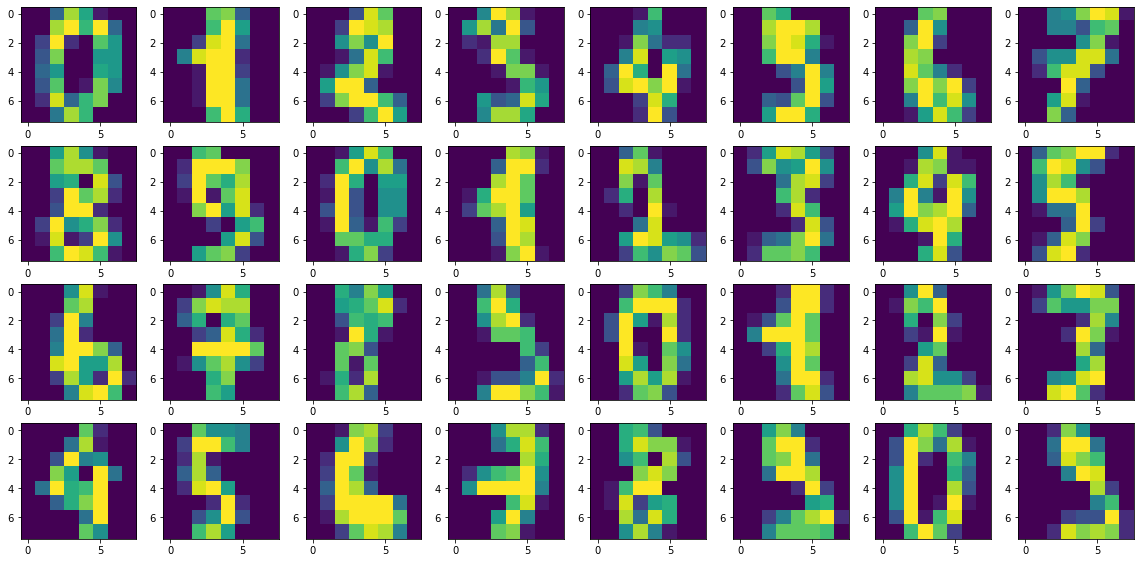

In [4]:
#ONE HOT ENCODING - features (roll number 52)

data = load_digits()

plt.figure(figsize = (20, 20))

for i in range(32):
    plt.subplot(8, 8, i + 1)
    plt.imshow(data.images[i])

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(data.data, data.target, test_size = 0.35, random_state = 52)

In [6]:
gnb = GaussianNB()

gnb.fit(X_train, Y_train)

Y_predicted = gnb.predict(X_test)

print(f"Accuracy is {metrics.accuracy_score(Y_test, Y_predicted)}")

Accuracy is 0.8251192368839427


In [7]:
data.images[3]

array([[ 0.,  0.,  7., 15., 13.,  1.,  0.,  0.],
       [ 0.,  8., 13.,  6., 15.,  4.,  0.,  0.],
       [ 0.,  2.,  1., 13., 13.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 15., 11.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1., 12., 12.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1., 10.,  8.,  0.],
       [ 0.,  0.,  8.,  4.,  5., 14.,  9.,  0.],
       [ 0.,  0.,  7., 13., 13.,  9.,  0.,  0.]])

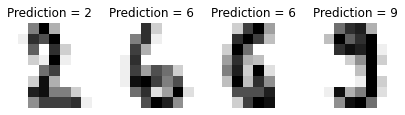

In [8]:
_, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (7, 5))
for ax, image, prediction in zip(axes, X_test, Y_predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap = plt.cm.gray_r, interpolation = 'nearest')
    ax.set_title(f'Prediction = {prediction}')

In [ ]:
print(f"Classification report for classifier {gnb}:\n"
      f"{metrics.classification_report(Y_test, Y_predicted)}\n")

Confusion matrix:
[[59  0  0  0  0  0  0  0  0  0]
 [ 0 52  0  0  0  0  0  0  7  0]
 [ 0 11 39  0  0  0  1  0 14  0]
 [ 0  2  1 50  0  2  0  4  4  1]
 [ 0  4  0  0 53  0  2  8  1  0]
 [ 0  0  0  2  0 55  2  2  0  1]
 [ 0  0  1  0  0  0 66  0  0  0]
 [ 0  0  0  0  1  0  0 67  0  1]
 [ 0 13  0  0  0  1  0  8 36  0]
 [ 1  4  0  0  0  2  0  7  2 42]]


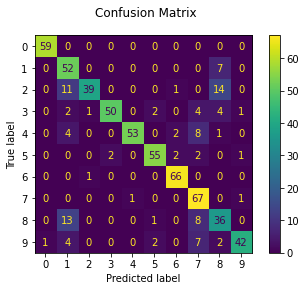

In [10]:
disp = metrics.plot_confusion_matrix(gnb, X_test, Y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()